## Understanding the problem
#### You were hired by Multiplan (Shopping Centers Manager) as Data Analyst. Your first task is generate insights which help administrators having an overview about shopping visitors based on income and score.

#### Importing Libraries

In [ ]:
# Biblioteca para análise de dados
import pandas as pd 

# Biblioteca para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

#### Collecting Data

One professional from data sector has accomplished the data extraction straight from Bank and provided you a csv format dataset containing relevant variables and may be useful to answer these questions.

- CustomerID - Identificação do Visitante
- Genre - Gênero do Visitante
- Age - Idade do Visitante
- Annual Income (kR$) - Renda anual do visitante
- Spending Score (1-100) - Score do Visitante

In [ ]:
df = pd.read_csv("clientes_shopping.csv")

In [ ]:
df.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
df.tail(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.drop(columns=['CustomerID'], inplace=True)

In [ ]:
df.rename(columns={'Genre': 'Genero', 'Age': 'Idade', 'Annual Income (k$)': 'Renda Anual(kR$)', 'Spending Score (1-100)':'Score(1-100)' }, inplace = True)

In [ ]:
df.shape

(200, 4)

In [ ]:
linhas, colunas = df.shape

In [ ]:
print(f"Número de visitantes do shopping conforme conjunto de dados disponibilizado é: {linhas}")

Número de visitantes do shopping conforme conjunto de dados disponibilizado é: 200


#### Informações Estatísticas

In [ ]:
df.describe().round(2)

,Idade,Renda Anual(kR$),Score(1-100)
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


#### Dados Faltantes

In [ ]:
df.isnull().sum()

Genero              0
Idade               0
Renda Anual(kR$)    0
Score(1-100)        0
dtype: int64

#### Duplicates

In [ ]:
df[df.duplicated()]

,Genero,Idade,Renda Anual(kR$),Score(1-100)


In [ ]:
df.columns

Index(['Genero', 'Idade', 'Renda Anual(kR$)', 'Score(1-100)'], dtype='object')

#### Genero - Gênero do Visitante do Shopping

In [ ]:
df['Genero'].nunique()

2

In [ ]:
df['Genero'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Genero'] = df['Genero'].replace(['Male'], 'Masculino')
df['Genero'] = df['Genero'].replace(['Female'], 'Feminino')

In [ ]:
df.head(3)

,Genero,Idade,Renda Anual(kR$),Score(1-100)
0,Masculino,19,15,39
1,Masculino,21,15,81
2,Feminino,20,16,6


#### Desses visitantes quantos são do sexo Masculino e Feminino?

In [ ]:
df['Genero'].value_counts()

Feminino     112
Masculino     88
Name: Genero, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


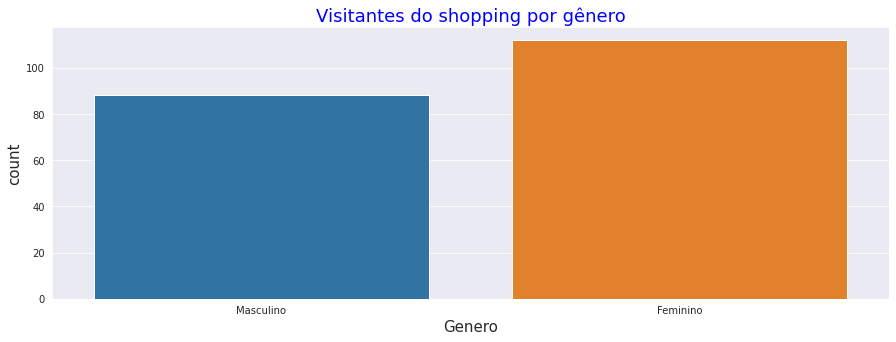

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Visitantes do shopping por gênero", fontsize=18, color='Blue')
plt.xlabel('Genero', fontsize=15)
plt.ylabel('Contagem de Visitantes', fontsize=15)
sns.countplot(df['Genero'])
plt.show()

Conclusão: os clientes do sexo feminino são mais em relação com os clientes do sexo masculino.

Age - idade do visitante do shopping

In [ ]:
df['Idade'].nunique()

51

In [ ]:
df['Idade'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [ ]:
df['Idade'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Idade, dtype: int64

In [ ]:
df['Idade'].describe().round(1)

count    200.0
mean      38.8
std       14.0
min       18.0
25%       28.8
50%       36.0
75%       49.0
max       70.0
Name: Idade, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


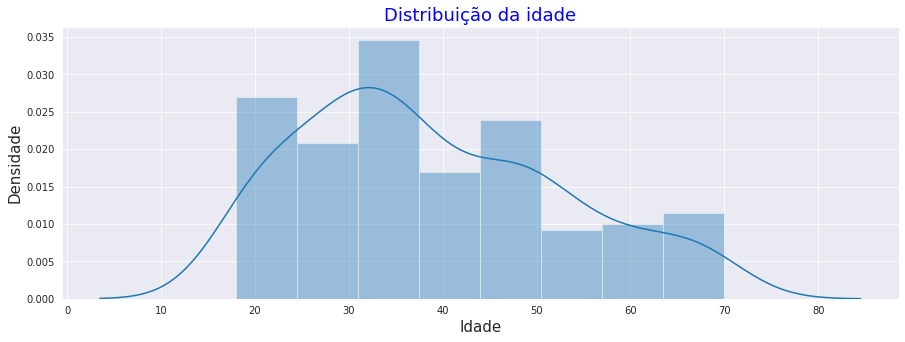

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Distribuição da idade", fontsize=18, color='Blue')
plt.xlabel('Variação da Idade', fontsize=15)
plt.ylabel('Densidade', fontsize=15)
sns.distplot(df['Idade'])
plt.show()

#### Conclusão: existem clientes com variedade de idades.

#### Annual Income (k$): renda anual

In [ ]:
df['Renda Anual(kR$)'].nunique()

64

In [ ]:
df['Renda Anual(kR$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [ ]:
df['Renda Anual(kR$)'].describe().round(1)

count    200.0
mean      60.6
std       26.3
min       15.0
25%       41.5
50%       61.5
75%       78.0
max      137.0
Name: Renda Anual(kR$), dtype: float64

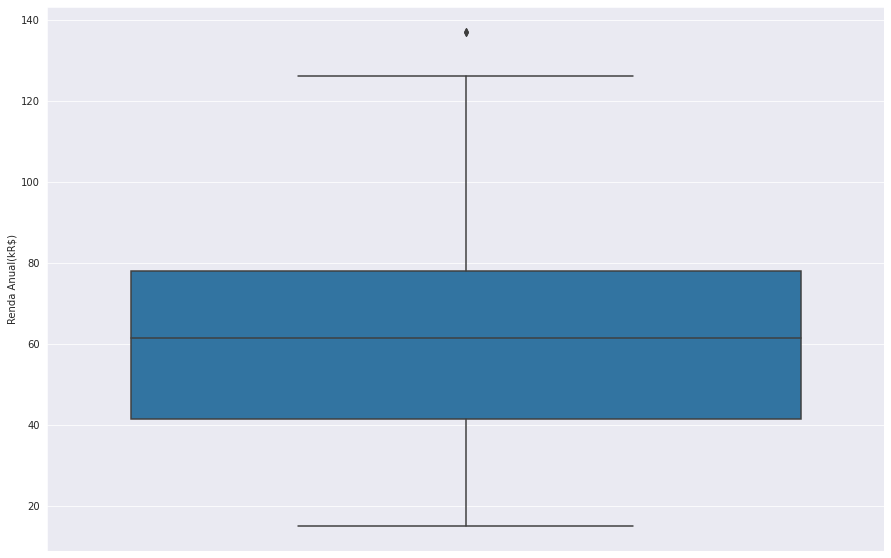

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, y='Renda Anual(kR$)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


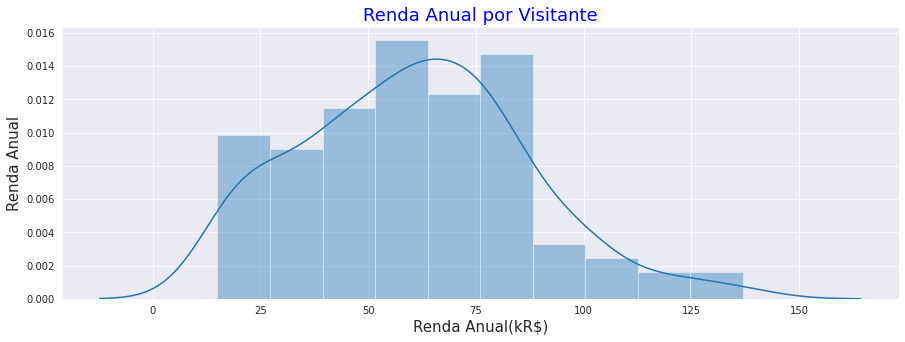

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Renda Anual por Visitante", fontsize=18, color='Blue')
plt.xlabel('Distribuição da Renda Anual', fontsize=15)
plt.ylabel('Renda Anual', fontsize=15)
sns.distplot(df['Renda Anual(kR$)'])
plt.show()

#### Conclusão: a maior parte da renda anual fica entre 50k e 85k.

In [ ]:
df['Score(1-100)'].nunique()

84

In [ ]:
df['Score(1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [ ]:
df['Score(1-100)'].describe().round(1)

count    200.0
mean      50.2
std       25.8
min        1.0
25%       34.8
50%       50.0
75%       73.0
max       99.0
Name: Score(1-100), dtype: float64

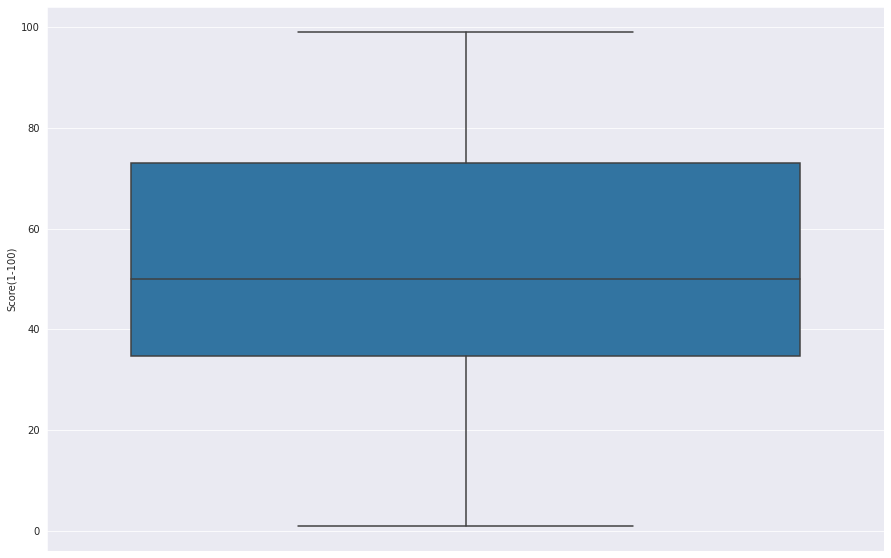

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, y='Score(1-100)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


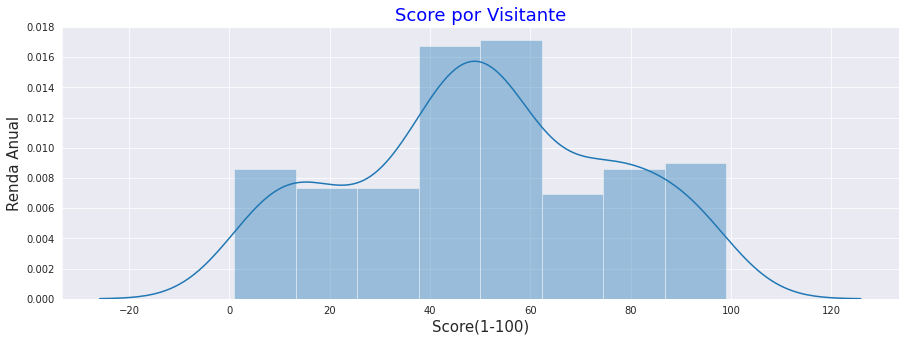

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Score por Visitante", fontsize=18, color='Blue')
plt.xlabel('Score(1-100)', fontsize=15)
plt.ylabel('Renda Anual', fontsize=15)
sns.distplot(df['Score(1-100)'])
plt.show()

Conclusão: a maioria dos clientes tem pontuação entre 40 e 60.

#### Como as variáveis se relacionam entre si?

In [ ]:
df.corr()

,Idade,Renda Anual(kR$),Score(1-100)
Idade,1.000000,-0.012398,-0.327227
Renda Anual(kR$),-0.012398,1.000000,0.009903
Score(1-100),-0.327227,0.009903,1.000000


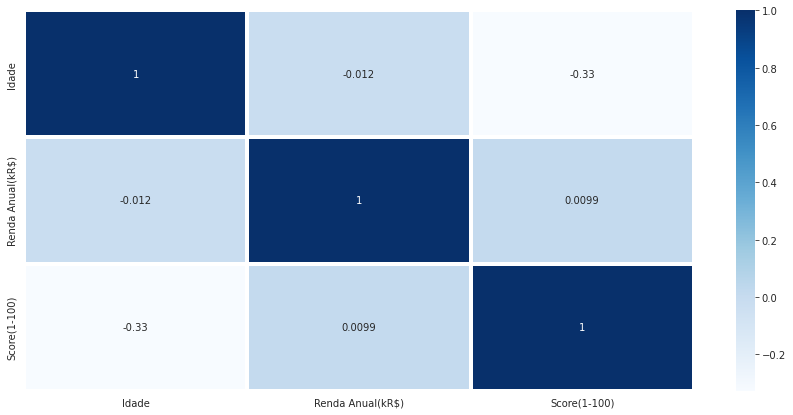

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap='Blues', annot=True, linewidth=3 )

#### Como a idade varia em relação ao gênero?

In [ ]:
df.groupby('Genero')['Idade'].mean()

Genero
Feminino     38.098214
Masculino    39.806818
Name: Idade, dtype: float64

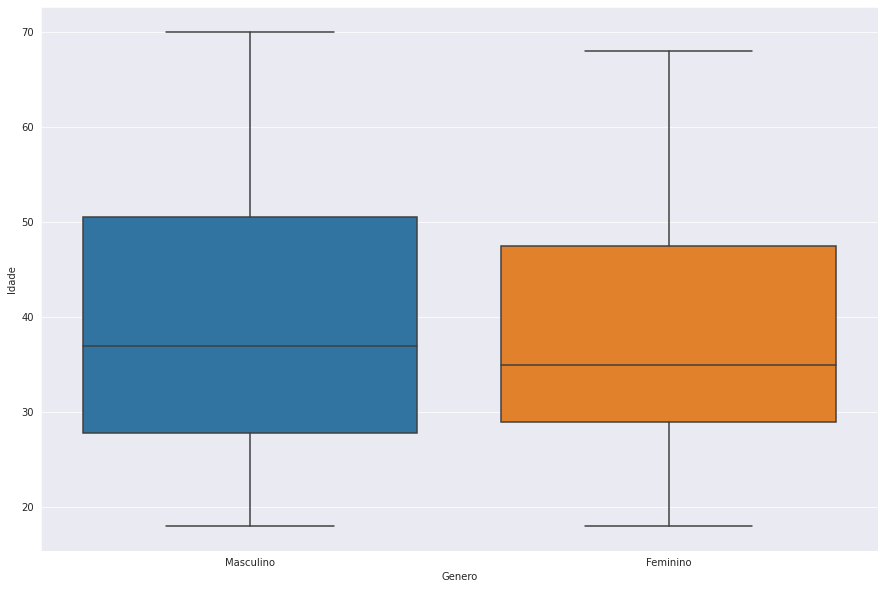

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Genero', y='Idade',data=df)

Conclusão: o público masculino tem maior variação de renda, seja no intervalo interquartil, seja entre os outliers.

#### Como a renda varia em relação ao gênero?

In [ ]:
df.groupby('Genero')['Renda Anual(kR$)'].mean()

Genero
Feminino     59.250000
Masculino    62.227273
Name: Renda Anual(kR$), dtype: float64

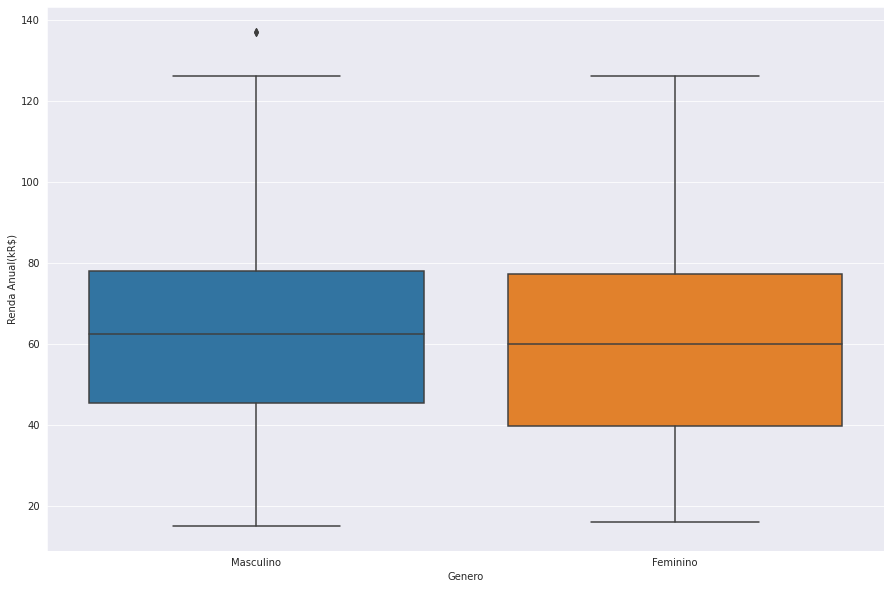

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Genero', y='Renda Anual(kR$)',data=df)

Conclusão: enquanto no público masculino tem renda entre os outliers, o público feminino tem maior variabilidade entre o intervalo interquartis.

#### Como a renda varia em relação a idade?

In [ ]:
df.groupby('Idade')['Renda Anual(kR$)'].mean()

Idade
18     51.250000
19     57.000000
20     41.600000
21     38.800000
22     31.333333
23     41.500000
24     39.250000
25     57.666667
26     58.000000
27     63.166667
28     85.250000
29     63.600000
30     76.142857
31     48.375000
32     87.181818
33     80.333333
34     79.000000
35     46.666667
36     81.000000
37     65.000000
38     74.500000
39     72.666667
40     61.666667
41    101.000000
42     60.000000
43     65.666667
44     75.500000
45     69.333333
46     59.000000
47     70.166667
48     58.200000
49     51.000000
50     58.600000
51     55.500000
52     55.500000
53     39.500000
54     59.750000
55     57.000000
56     79.000000
57     64.500000
58     54.000000
59     65.250000
60     43.333333
63     56.500000
64     19.000000
65     50.500000
66     63.000000
67     45.500000
68     56.666667
69     44.000000
70     47.500000
Name: Renda Anual(kR$), dtype: float64

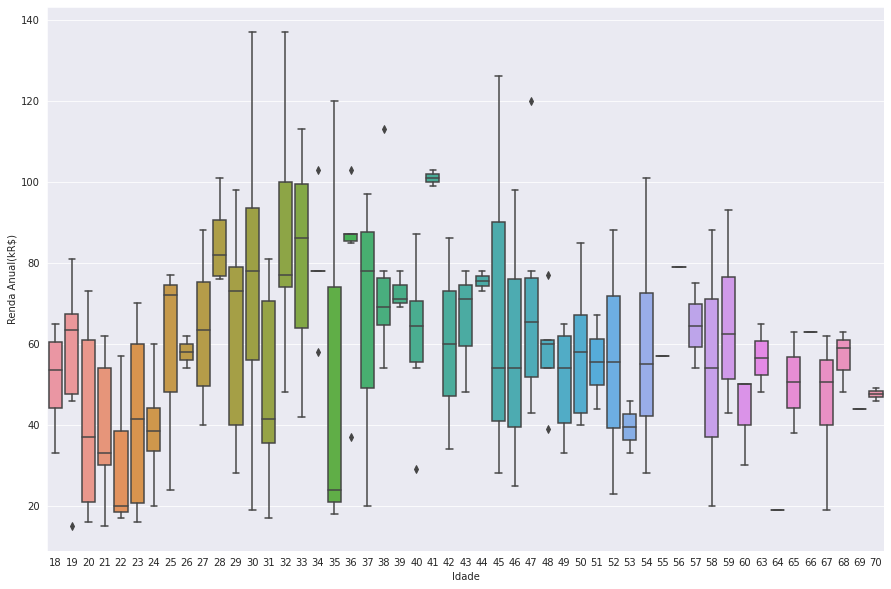

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Idade', y='Renda Anual(kR$)',data=df)